In [2]:
import osmnx as ox
import networkx as nx
import numpy as np

import helper_functions as hf
import importlib
importlib.reload(hf)

import dai
importlib.reload(dai)

<module 'dai' from '/home/lema/Documents/diplomska/dai/dai.py'>

In [27]:
# place = 'Kamppi, Helsinki, Finland'
# graph_ox = ox.graph_from_place(place,network_type='drive')

# # print(type(graph_ox))
# # fig, ax = ox.plot_graph(graph_ox,edge_color='y')

# graph = nx.convert_node_labels_to_integers(nx.DiGraph(graph_ox))
# # graph.nodes()
# # graph.edges(data=True)



# hf.fill_maxspeed(graph)

# graph.edges(data=True)
# times = {e: np.round(graph.edges()[e]["length"]/graph.edges()[e]["maxspeed"]) for e in graph.edges()}
# capacities = {e: np.floor(1 + graph.edges()[e]["length"]*graph.edges()[e]["maxspeed"]/1000) for e in graph.edges()}
# nx.set_edge_attributes(graph, times,"c")
# nx.set_edge_attributes(graph, capacities,"cap")

# import pickle
# file = open('helsinki_nx.pkl', 'wb')
# pickle.dump(graph,file)
# file.close()


living_street is set to 30
living_street is set to 30
residential is set to 30
residential is set to 30
living_street is set to 30
living_street is set to 30


In [3]:
import pickle
file = open('/home/lema/Documents/diplomska/dai/helsinki_nx.pkl', 'rb')
graph = pickle.load(file)
file.close()

array([[<AxesSubplot: title={'center': 'cap'}>]], dtype=object)

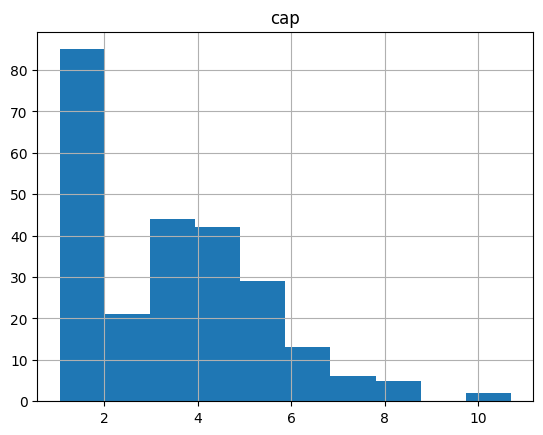

In [5]:
graph.edges(data=True)
df = nx.to_pandas_edgelist(graph, nodelist=graph.nodes())
df[["cap"]].hist(bins=10)

In [6]:
graph.nodes(data=True)
# df = nx.to_pandas_nodelist(graph, nodelist=graph.nodes())
# df[["cap"]].hist(bins=10)
# df

NodeDataView({0: {'y': 60.1647939, 'x': 24.9210566, 'street_count': 4}, 1: {'y': 60.1636645, 'x': 24.9210282, 'street_count': 4}, 2: {'y': 60.164631, 'x': 24.9212859, 'street_count': 3}, 3: {'y': 60.1643255, 'x': 24.9370233, 'street_count': 4}, 4: {'y': 60.1659479, 'x': 24.9416738, 'street_count': 4}, 5: {'y': 60.1651348, 'x': 24.939344, 'highway': 'traffic_signals', 'street_count': 4}, 6: {'y': 60.1653511, 'x': 24.9355842, 'street_count': 4}, 7: {'y': 60.1634458, 'x': 24.9345002, 'street_count': 4}, 8: {'y': 60.1711426, 'x': 24.9324437, 'street_count': 4}, 9: {'y': 60.1694182, 'x': 24.9273621, 'street_count': 3}, 10: {'y': 60.1707248, 'x': 24.9315761, 'street_count': 3}, 11: {'y': 60.1664916, 'x': 24.9306919, 'street_count': 4}, 12: {'y': 60.1669427, 'x': 24.9272265, 'highway': 'traffic_signals', 'street_count': 3}, 13: {'y': 60.1641708, 'x': 24.9266982, 'street_count': 4}, 14: {'y': 60.1657346, 'x': 24.9261818, 'street_count': 1}, 15: {'y': 60.1636339, 'x': 24.9274293, 'street_count'

In [38]:
# obj,constraints,vp = dai.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
demands = [(15,91,5)]
obj, constraints, obj_ex, constraints_ex_additional, vp = dai.init_from_graph(graph,demands)

# dai.plot_multigraph(graph, with_labels=True, font_size=10)

[1. 0. 1. 6. 5. 5. 6. 5. 5. 5. 5. 5. 3. 6. 6. 6. 4. 4. 2. 3. 0. 0. 0. 4.
 4. 8. 2. 3. 2. 4. 3. 3. 2. 6. 5. 2. 0. 5. 3. 5. 3. 5. 6. 3. 0. 3. 3. 1.
 1. 8. 1. 0. 1. 1. 1. 3. 1. 3. 1. 1. 3. 2. 0. 1. 3. 3. 1. 2. 2. 1. 0. 4.
 3. 0. 3. 0. 0. 1. 5. 5. 3. 0. 0. 3. 0. 1. 1. 0. 1. 3. 1. 4. 4. 2. 2. 1.
 1. 3. 0. 8. 2. 1. 3. 3. 0. 0. 2. 0. 4. 0. 0. 0. 0. 1. 0. 6. 0. 1. 1. 0.
 0. 0. 1. 1. 3. 1. 1. 0. 1. 0. 1. 3. 1. 2. 3. 8. 1. 5. 3. 2. 2. 3. 2. 5.
 4. 4. 5. 4. 1. 3. 1. 2. 3. 0. 0. 0. 1. 2. 4. 4. 3. 3. 0. 8. 5. 2. 3. 3.
 3. 5. 3. 2. 8. 8. 3. 6. 4. 2. 4. 2. 6. 4. 0. 2. 1. 1. 3. 1. 4. 2. 1. 0.
 0. 3. 4. 6. 6. 3. 2. 3. 6. 2. 3. 3. 3. 3. 2. 0. 3. 5. 7. 2. 3. 5. 5. 3.
 4. 5. 2. 5. 3. 5. 3. 5. 5. 7. 5. 0. 3. 6. 0. 3. 1. 0. 2. 3. 0. 6. 0. 2.
 1. 0. 1. 0. 1. 3. 1.]
[ 2.  1.  2. 10.  5.  5.  6.  5.  5.  5.  5.  5.  4.  6.  6.  6.  4.  4.
  3.  4.  1.  1.  1.  4.  4.  8.  3.  4.  2.  4.  4.  3.  3.  6.  5.  2.
  1.  5.  3.  5.  4.  5.  6.  3.  1.  3.  4.  2.  1.  8.  1.  1.  1.  1.
  1.  3.  1.  4.  2.  2.  3.

In [10]:
# from networkx.drawing.nx_agraph import write_dot
# write_dot(graph,'multi.dot')

In [15]:
# nx.write_latex(graph,"latex_graph.txt")
# from network2tikz import plot
# plot(graph,'mypdf.pdf')

In [7]:
list(graph.edges())[179]

(92, 91)

beta halfed in  2
beta halfed in  3
beta halfed in  4
beta halfed in  5
beta halfed in  6
beta halfed in  7
beta halfed in  8
9 0.00859375
NODE NOT SEARCHED FOR FEASIBILITY
4.0
4.0
4.0
4.0
8.0
 heuristic success
0 / 0: neki heuristic  feasible  FEASIBLE for I OPTIMAL for I z: 24, zLD: 24.0 cap_ok = True

VSE PREISKANO
0 / 0: neki heuristic  feasible  FEASIBLE for I OPTIMAL for I z: 24, zLD: 24.0 cap_ok = True
  (24, 0)	1.0
  (29, 0)	4.0
  (32, 0)	1.0
  (179, 0)	1.0


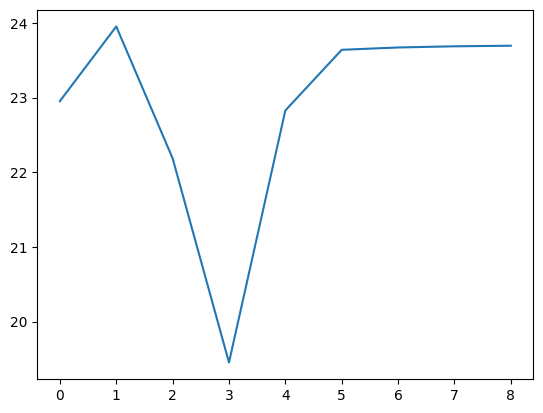

In [47]:
importlib.reload(dai)
n_best = dai.run(obj,constraints,obj_ex, constraints_ex_additional, vp,graph,demands,MAX_ITER=10,MAX_ITER_LR=50)
# TODO LB je prevelik, ker obstaja pot s ceno 24

In [42]:
# LB, UB, X_best = dai.run2(obj,constraints,vp,MAX_ITER=1000)
# print(LB,UB,X_best)

k	COLOR
0 	 b


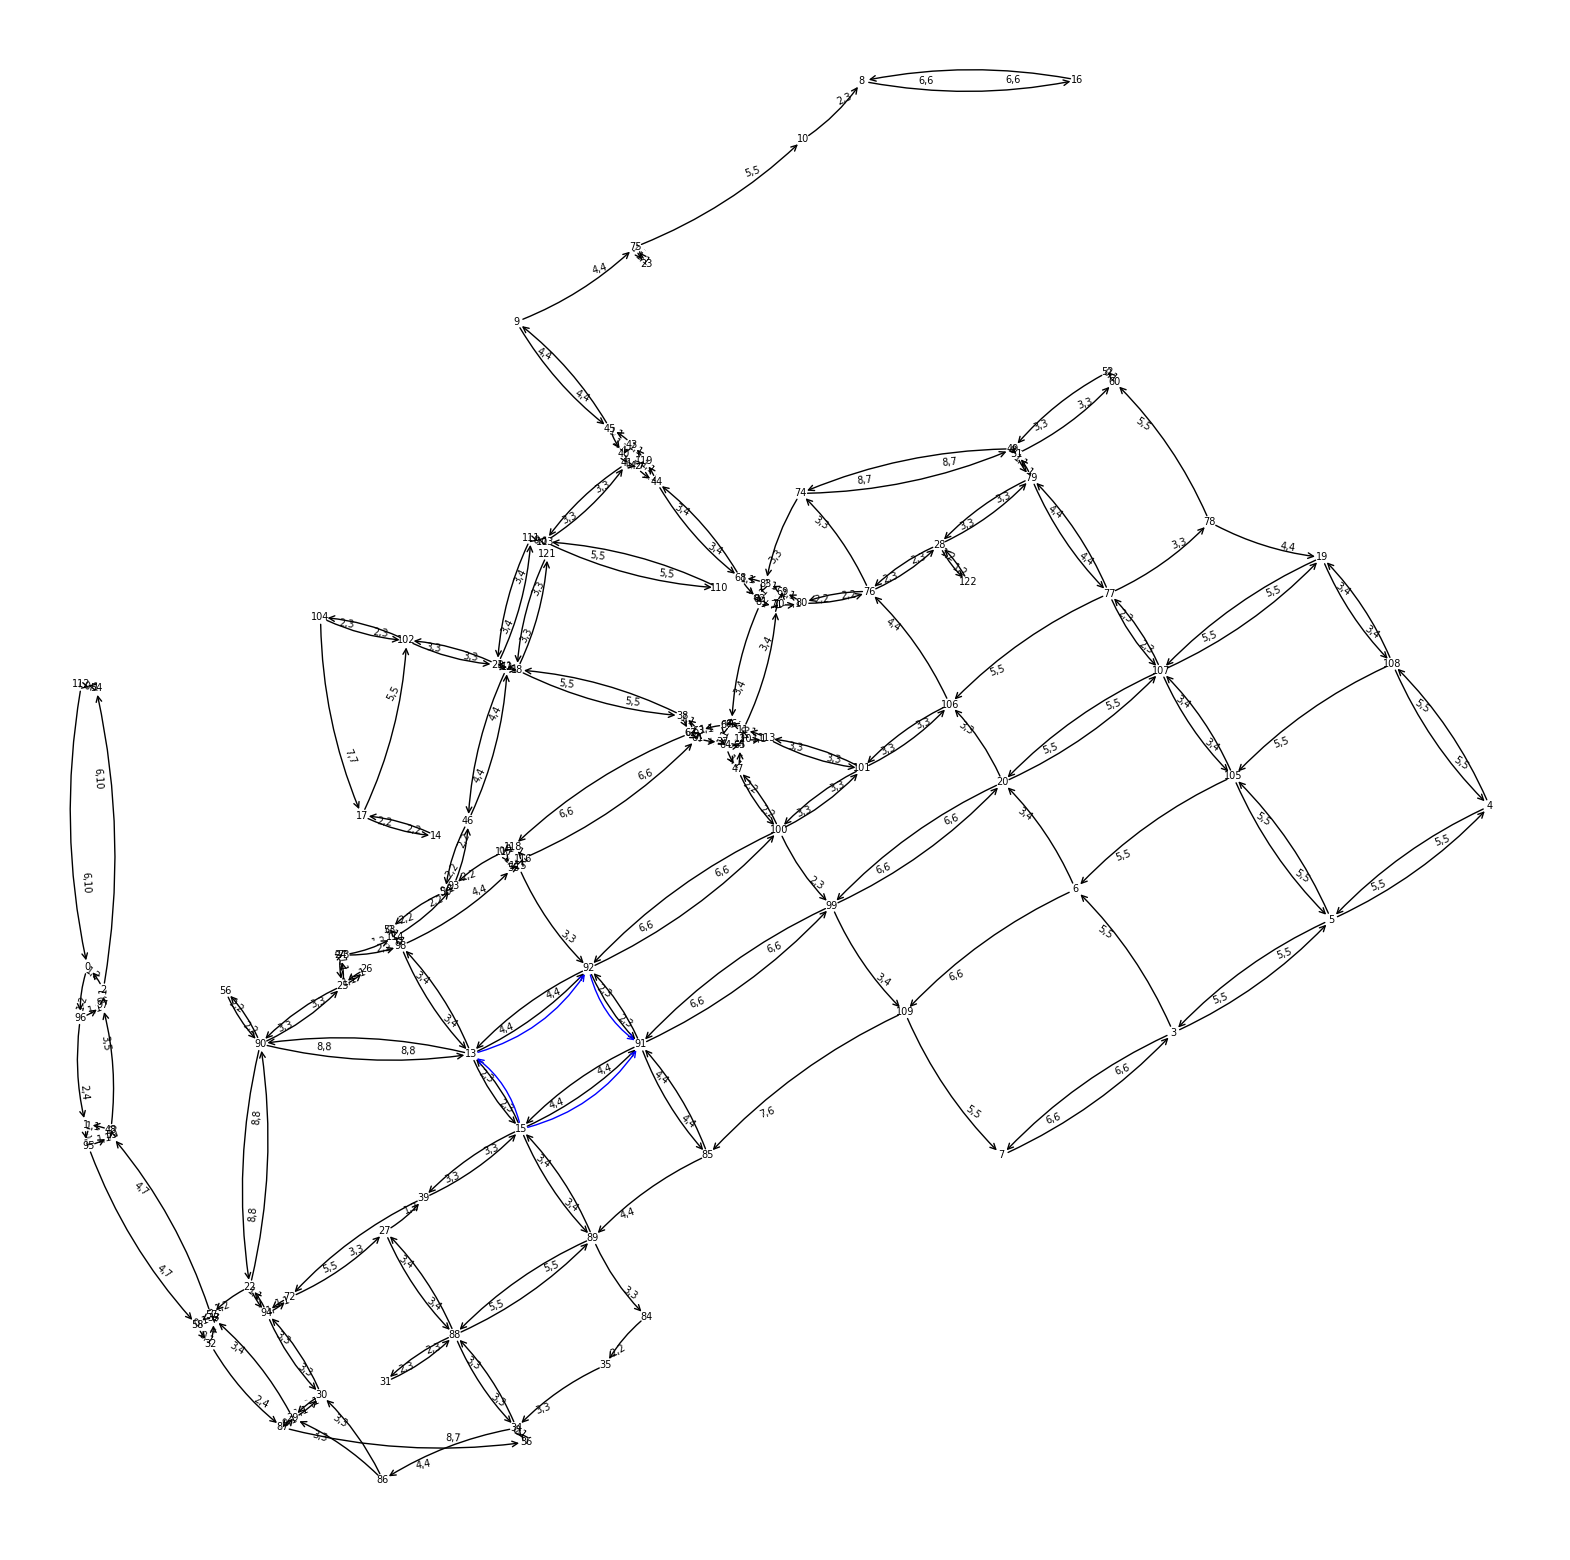

In [70]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)

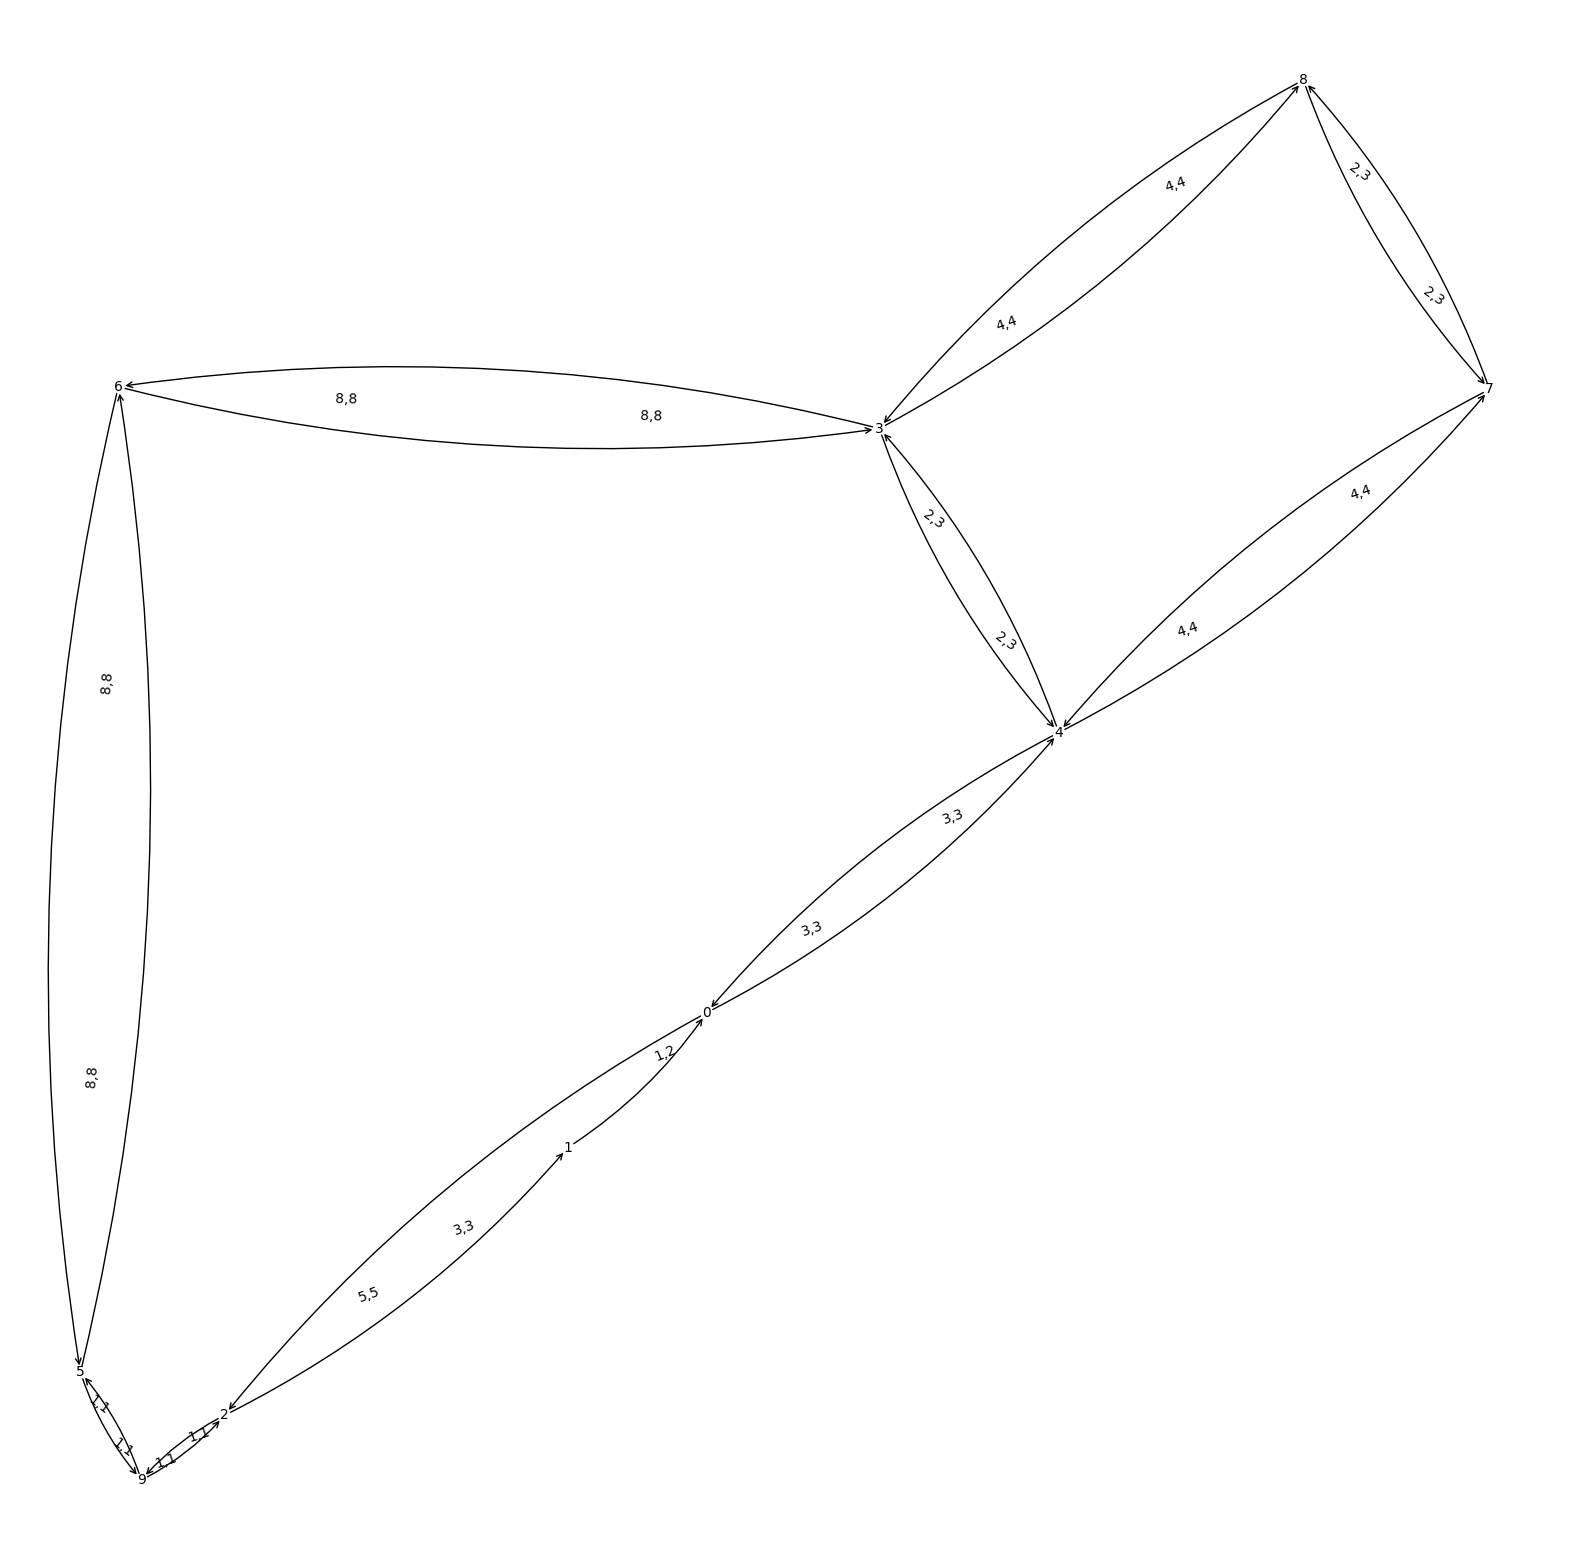

In [14]:

subgraph = nx.convert_node_labels_to_integers(graph.subgraph([92,91,15,13,39,27,72,94,22,90]))
hf.plot_multigraph(subgraph, with_labels=True, font_size=10)

In [3]:
# obj1,constraints1,vp1 = dai.init_from_graph(subgraph,[(15,91,5)])
obj1,constraints1,vp1 = dai.init_from_graph(subgraph,[(4,7,5)])
n_best = dai.run(obj1,constraints1,vp1,graph,MAX_ITER=40,MAX_ITER_LR=50)

NameError: name 'subgraph' is not defined

In [8]:
# df = nx.to_pandas_edgelist(subgraph, nodelist=graph.nodes())
# df

In [25]:
# obj,constraints,vp = dai.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
demands = [(6,20,1),(6,100,3),(6,105,2)]
# obj,constraints,vp = dai.init_from_graph(graph,demands)
obj, constraints, obj_ex, constraints_ex_additional, vp = dai.init_from_graph(graph,demands)
# hf.plot_multigraph(graph, with_labels=True, font_size=10)

[1. 0. 1. 6. 5. 5. 6. 5. 5. 5. 5. 5. 3. 6. 6. 6. 4. 4. 2. 3. 0. 0. 0. 4.
 4. 8. 2. 3. 2. 4. 3. 3. 2. 6. 5. 2. 0. 5. 3. 5. 3. 5. 6. 3. 0. 3. 3. 1.
 1. 8. 1. 0. 1. 1. 1. 3. 1. 3. 1. 1. 3. 2. 0. 1. 3. 3. 1. 2. 2. 1. 0. 4.
 3. 0. 3. 0. 0. 1. 5. 5. 3. 0. 0. 3. 0. 1. 1. 0. 1. 3. 1. 4. 4. 2. 2. 1.
 1. 3. 0. 8. 2. 1. 3. 3. 0. 0. 2. 0. 4. 0. 0. 0. 0. 1. 0. 6. 0. 1. 1. 0.
 0. 0. 1. 1. 3. 1. 1. 0. 1. 0. 1. 3. 1. 2. 3. 8. 1. 5. 3. 2. 2. 3. 2. 5.
 4. 4. 5. 4. 1. 3. 1. 2. 3. 0. 0. 0. 1. 2. 4. 4. 3. 3. 0. 8. 5. 2. 3. 3.
 3. 5. 3. 2. 8. 8. 3. 6. 4. 2. 4. 2. 6. 4. 0. 2. 1. 1. 3. 1. 4. 2. 1. 0.
 0. 3. 4. 6. 6. 3. 2. 3. 6. 2. 3. 3. 3. 3. 2. 0. 3. 5. 7. 2. 3. 5. 5. 3.
 4. 5. 2. 5. 3. 5. 3. 5. 5. 7. 5. 0. 3. 6. 0. 3. 1. 0. 2. 3. 0. 6. 0. 2.
 1. 0. 1. 0. 1. 3. 1.]
[ 2.  1.  2. 10.  5.  5.  6.  5.  5.  5.  5.  5.  4.  6.  6.  6.  4.  4.
  3.  4.  1.  1.  1.  4.  4.  8.  3.  4.  2.  4.  4.  3.  3.  6.  5.  2.
  1.  5.  3.  5.  4.  5.  6.  3.  1.  3.  4.  2.  1.  8.  1.  1.  1.  1.
  1.  3.  1.  4.  2.  2.  3.

/home/lema/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


beta halfed in  1
beta halfed in  2
beta halfed in  3
beta halfed in  4
beta halfed in  6
beta halfed in  8
beta halfed in  10
11 0.00859375
*
**
***
beta halfed in  1
beta halfed in  2
beta halfed in  3
beta halfed in  4
beta halfed in  5
beta halfed in  6
beta halfed in  7
8 0.00859375
**
****
beta halfed in  1
beta halfed in  2
beta halfed in  3
beta halfed in  4
beta halfed in  5
beta halfed in  6
beta halfed in  7
8 0.00859375
**
*****
*****
beta halfed in  1
beta halfed in  2
beta halfed in  3
beta halfed in  4
beta halfed in  5
beta halfed in  6
beta halfed in  7
8 0.00859375
*
beta halfed in  1
beta halfed in  2
beta halfed in  3
beta halfed in  4
beta halfed in  5
beta halfed in  6
beta halfed in  7
8 0.00859375
**
*****
beta halfed in  3
beta halfed in  6
beta halfed in  8
beta halfed in  10
beta halfed in  11
beta halfed in  12
beta halfed in  13
14 0.00859375
**
******
*******
******
*******
**
beta halfed in  1
beta halfed in  2
beta halfed in  3
beta halfed in  4
beta hal

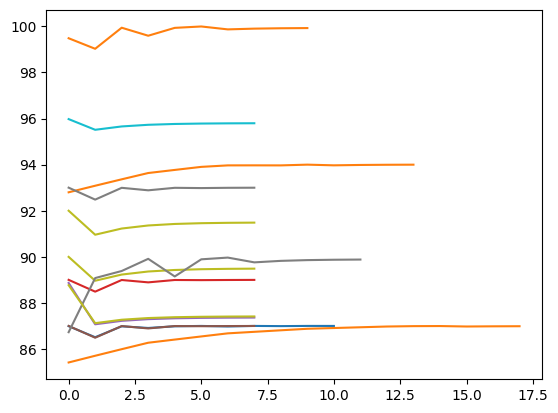

In [37]:
importlib.reload(dai)
# n_best = dai.run(obj,constraints,vp,graph,demands,MAX_ITER=40,MAX_ITER_LR=20)
n_best = dai.run(obj,constraints,obj_ex, constraints_ex_additional, vp,graph,demands,MAX_ITER=40,MAX_ITER_LR=50)



In [74]:
# importlib.reload(dai)
# n_best = dai.run(obj,constraints,vp,graph,demands,MAX_ITER=200,MAX_ITER_LR=5)

k	COLOR
0 	 b
1 	 r
2 	 g


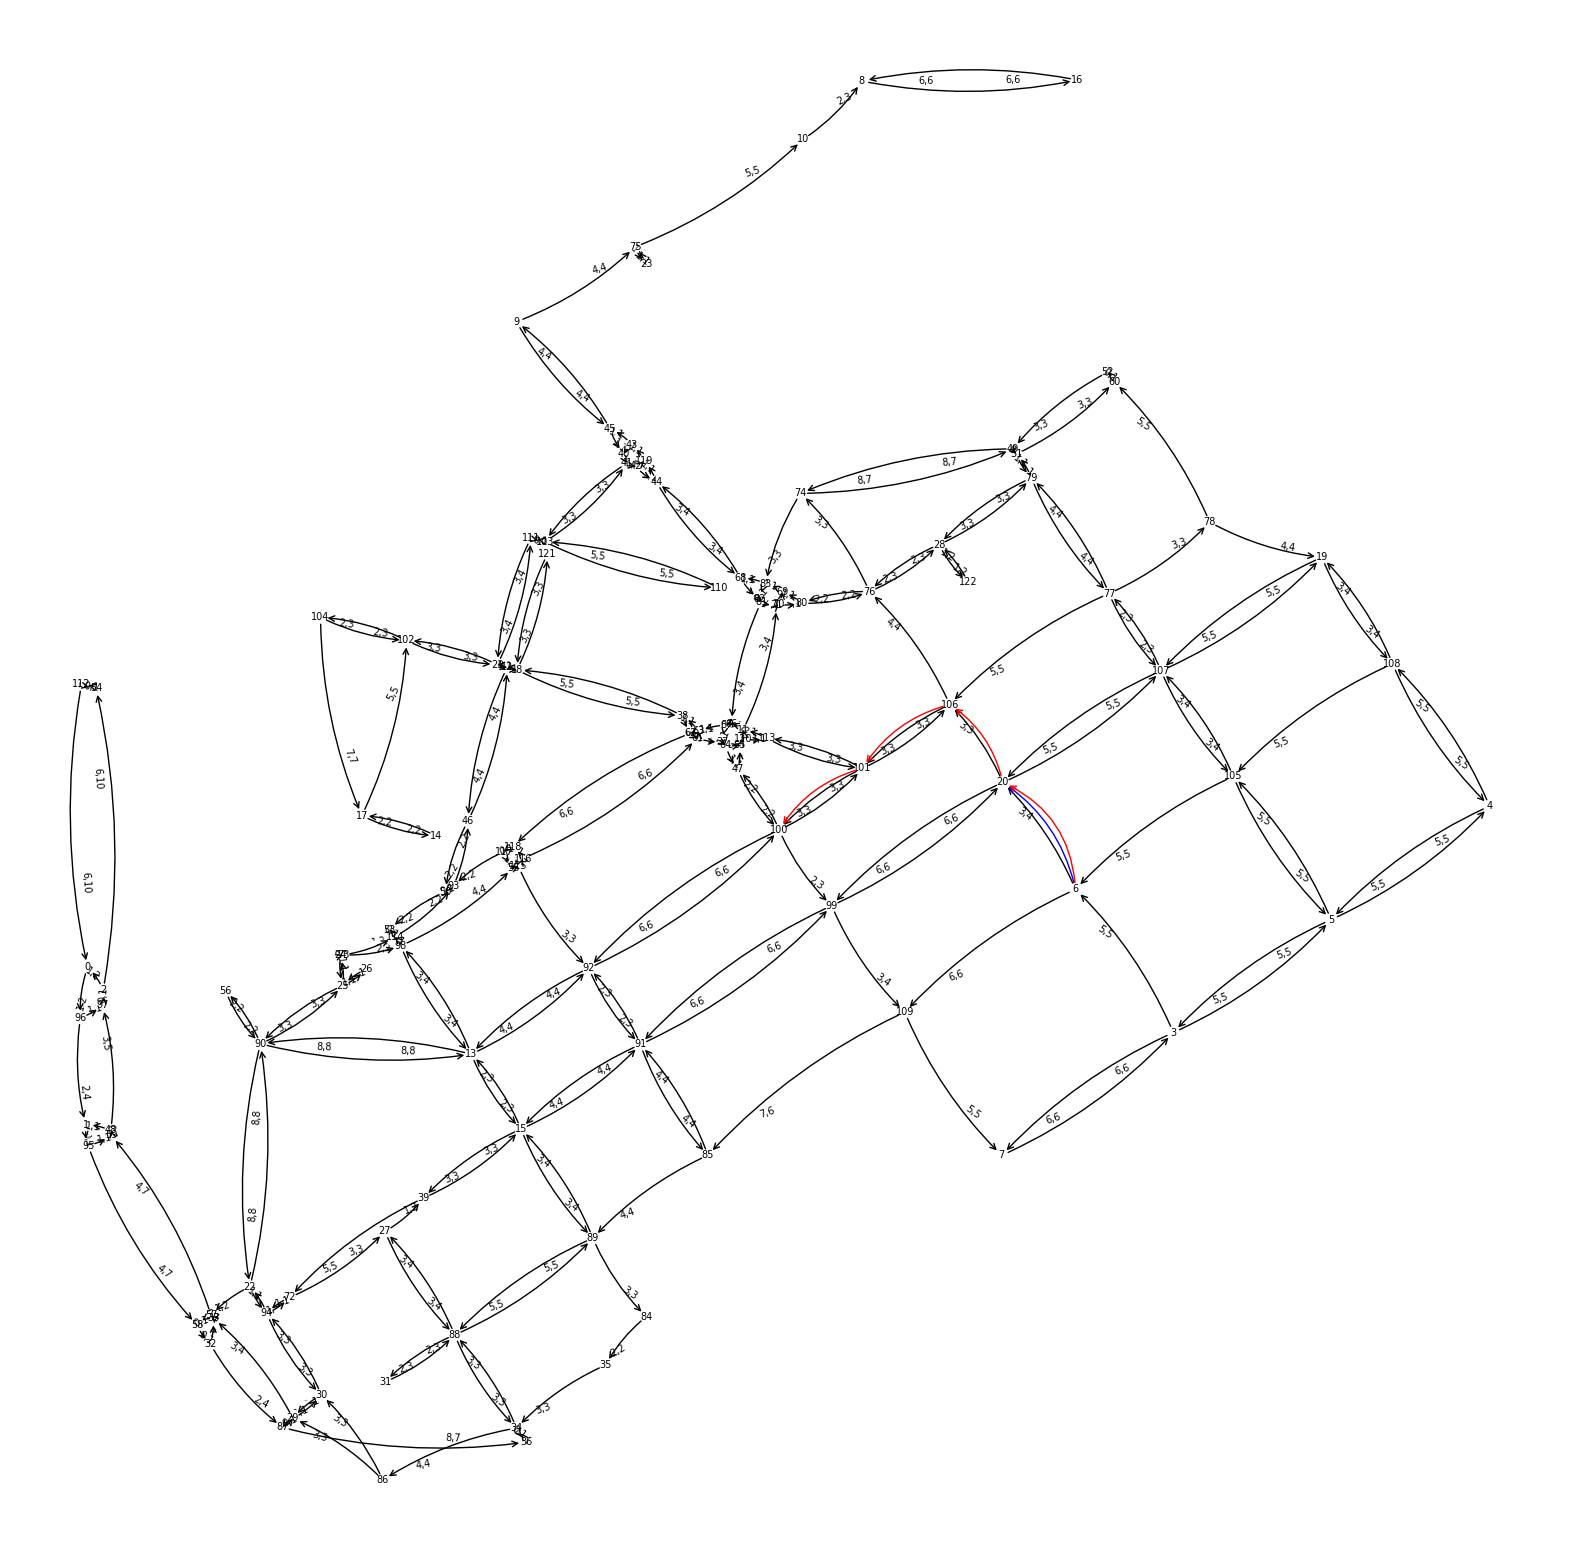

In [82]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)
# [(6,20,1),(6,100,3),(6,105,2)]

In [1]:
n_best = dai.run(obj,constraints,vp,graph,MAX_ITER=40,MAX_ITER_LR=20)

NameError: name 'dai' is not defined

k	COLOR
0 	 b
1 	 r
2 	 g


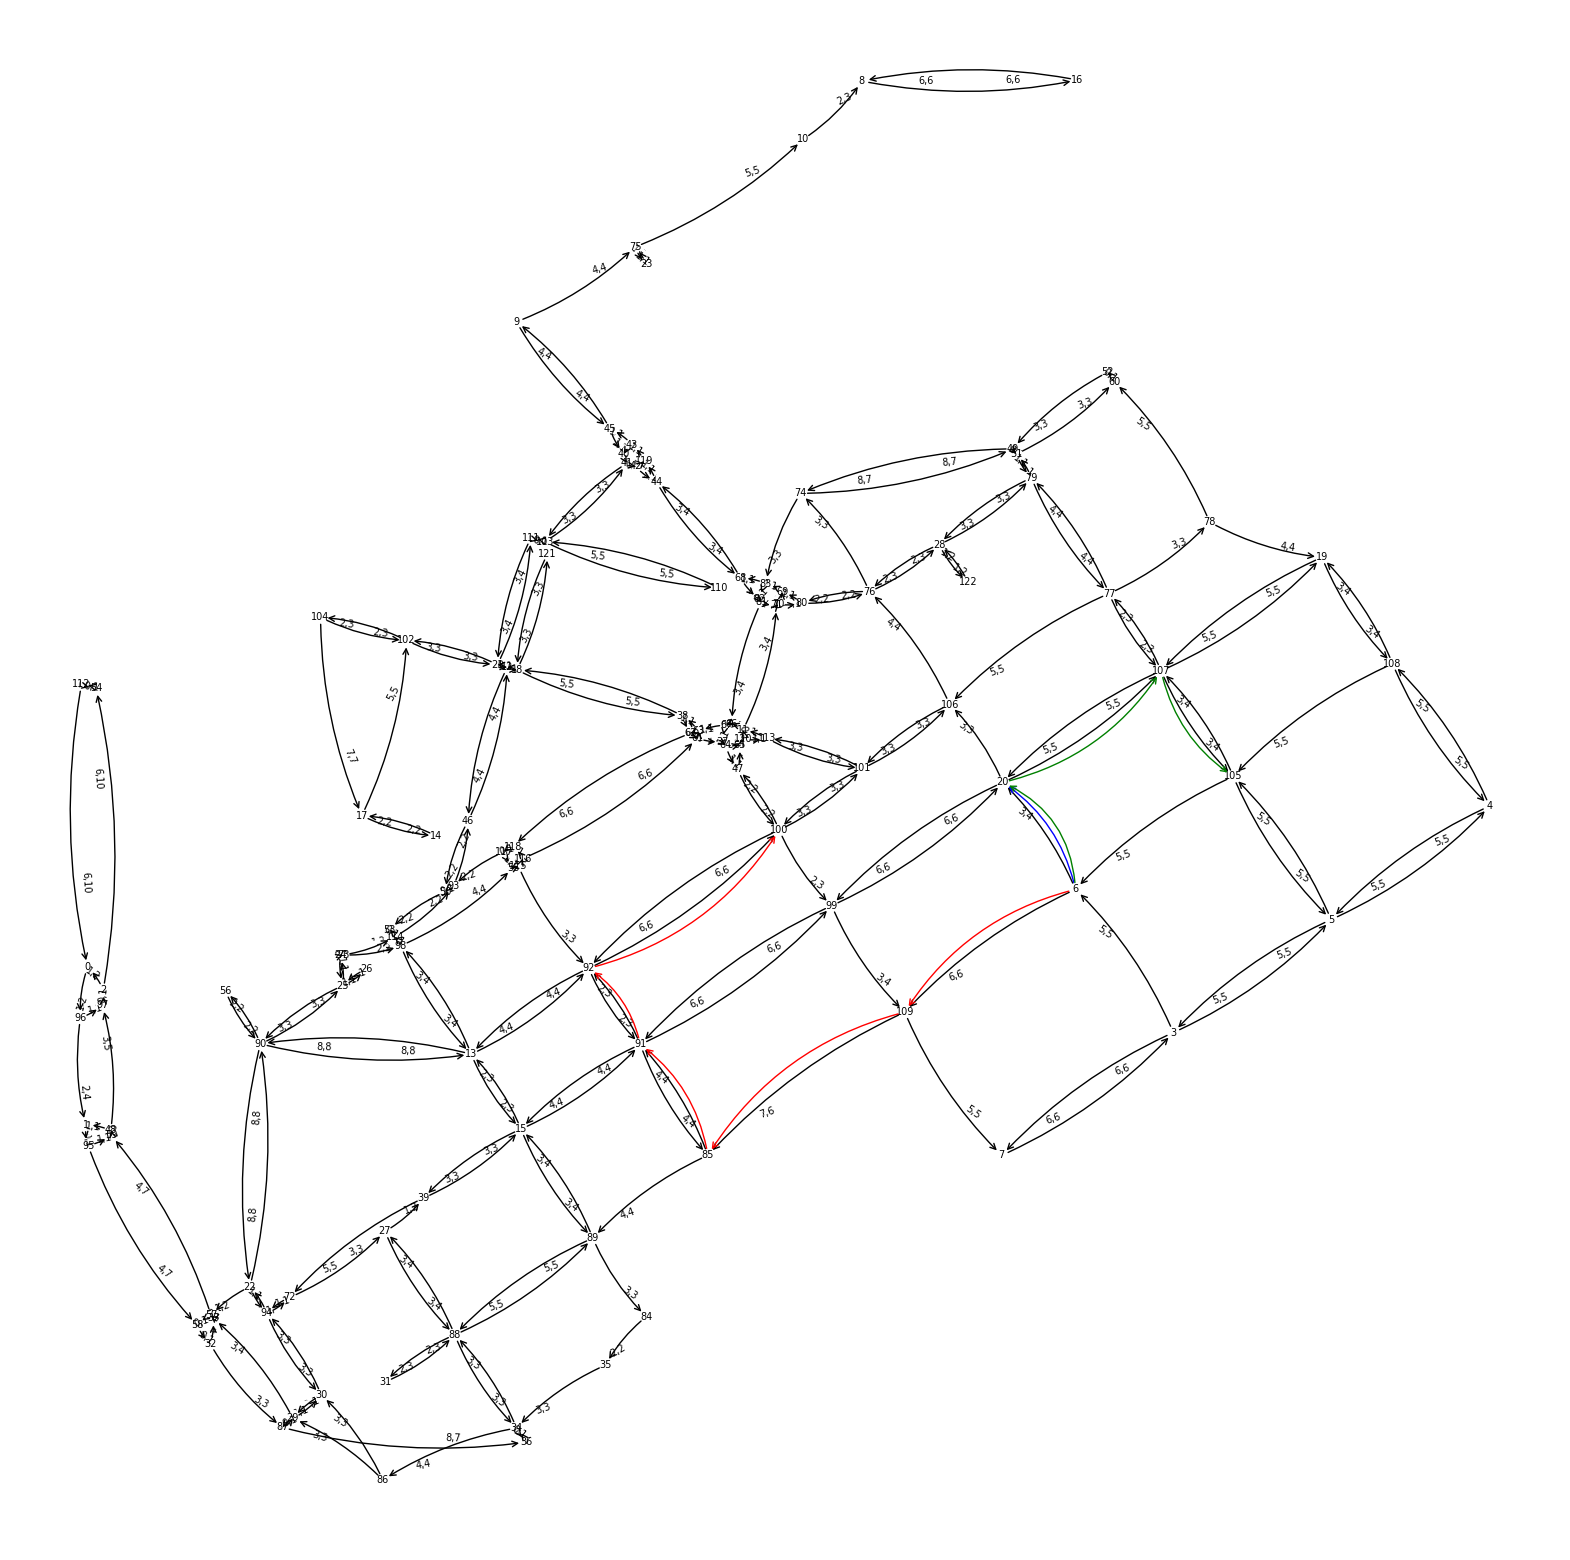

In [6]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)
# [(6,20,1),(6,100,3),(6,105,2)]

In [46]:
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>